# Mackey-Glass equation

The Mackey-Glass equation is the nonlinear time delay differential equation

$$
\frac{dx}{dt} = \beta \frac{ x_{\tau} }{1+{x_{\tau}}^n}-\gamma x, \quad \gamma,\beta,n > 0,
$$

where $\beta, \gamma, \tau, n$ are real numbers, and $x_{\tau}$ represents the value of the variable $x$ at time $(t−\tau)$. Depending on the values of the parameters, this equation displays a range of periodic and chaotic dynamics. 

In [1]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt

In [2]:
bm.set_dt(0.05)

In [3]:
class MackeyGlassEq(bp.NeuGroup):
  def __init__(self, num, beta=2., gamma=1., tau=2., n=9.65):
    super(MackeyGlassEq, self).__init__(num)

    # parameters
    self.beta = beta
    self.gamma = gamma
    self.tau = tau
    self.n = n
    self.delay_len = int(tau/bm.get_dt())

    # variables
    self.x = bm.Variable(bm.zeros(num))
    self.x_delay = bm.LengthDelay(
      self.x,
      delay_len=self.delay_len,
      initial_delay_data=lambda sh, dtype: 1.2+0.2*(bm.random.random(sh)-0.5)
    )
    self.x_oldest = bm.Variable(self.x_delay(self.delay_len))

    # functions
    self.integral = bp.odeint(lambda x, t, x_tau: self.beta * x_tau / (1 + x_tau ** self.n) - self.gamma * x,
                              method='exp_auto')

  def update(self, tdi):
    self.x.value = self.integral(self.x.value, tdi.t, self.x_oldest.value, tdi.dt)
    self.x_delay.update(self.x.value)
    self.x_oldest.value = self.x_delay(self.delay_len)

In [4]:
eq = MackeyGlassEq(1, beta=0.2, gamma=0.1, tau=17, n=10)
# eq = MackeyGlassEq(1, )

In [5]:
runner = bp.DSRunner(eq, monitors=['x', 'x_oldest'])
runner.run(1000)

  0%|          | 0/20000 [00:00<?, ?it/s]

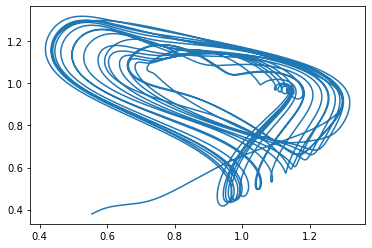

In [6]:
plt.plot(runner.mon.x[1000:, 0], runner.mon.x_oldest[1000:, 0])
plt.show()